In [1]:
!pip install tensorflow-gpu

In [3]:
# import the libraries as shown below
import os
import cv2
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
tf.__version__

'2.5.0'

In [2]:
!nvidia-smi

Mon Jul 26 16:39:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#The default input image size of Inception-v3 is 299×299; however, the image size in the dataset was 224×224
# re-size all the images to this

IMAGE_SIZE = [224, 224]
train = "/content/drive/MyDrive/CNN_Dataset/train"
test = "/content/drive/MyDrive/CNN_Dataset/test"

In [6]:
# Import the Inception v3 library as shown below and add preprocessing layer to the front of VGG
#image is RGB(3)
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [7]:
#Loading the image for ploting
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=cv2.resize(img,(128,128))
            images.append(img1)
    return images

In [8]:
#convert nparry and load the images for Visualation
train_ = np.array(train)
abhay_deol = load_images_from_folder(r"/content/drive/MyDrive/CNN_Dataset/train/hrithik_roshan")

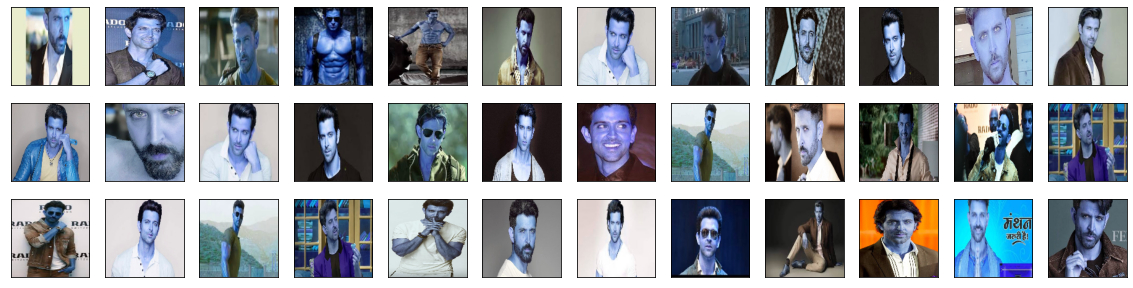

In [9]:
#Visualize the images 
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(abhay_deol[i]))

In [10]:
# I don't to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
class_folders = glob('/content/drive/MyDrive/CNN_Dataset/train/*')

In [12]:
class_folders

['/content/drive/MyDrive/CNN_Dataset/train/zeenat_aman',
 '/content/drive/MyDrive/CNN_Dataset/train/tinnu_anand',
 '/content/drive/MyDrive/CNN_Dataset/train/sunny_deol',
 '/content/drive/MyDrive/CNN_Dataset/train/waheeda_rehman',
 '/content/drive/MyDrive/CNN_Dataset/train/vidya_balan',
 '/content/drive/MyDrive/CNN_Dataset/train/utpal_dutt',
 '/content/drive/MyDrive/CNN_Dataset/train/vinod_khanna',
 '/content/drive/MyDrive/CNN_Dataset/train/tabu',
 '/content/drive/MyDrive/CNN_Dataset/train/zarina_wahab',
 '/content/drive/MyDrive/CNN_Dataset/train/varun_dhawan',
 '/content/drive/MyDrive/CNN_Dataset/train/sunil_shetty',
 '/content/drive/MyDrive/CNN_Dataset/train/soumitra_chatterjee',
 '/content/drive/MyDrive/CNN_Dataset/train/shah_rukh_khan',
 '/content/drive/MyDrive/CNN_Dataset/train/shashi_kapoor',
 '/content/drive/MyDrive/CNN_Dataset/train/sridevi',
 '/content/drive/MyDrive/CNN_Dataset/train/shreyas_talpade',
 '/content/drive/MyDrive/CNN_Dataset/train/sharman_joshi',
 '/content/drive/M

In [13]:
# our layers - we can add more as per requirement
x = Flatten()(inception.output)

In [14]:
# defined the output class for predection 
prediction = Dense(len(class_folders), activation='softmax')(x)

In [15]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.1)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/CNN_Dataset/train",
                                                 target_size = (224, 224),
                                                 batch_size = 60,
                                                 subset = "training",
                                                 class_mode = 'categorical')

Found 4284 images belonging to 135 classes.


In [20]:
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/CNN_Dataset/train",
                                            target_size = (224, 224),
                                            batch_size = 60,
                                            subset = "validation",
                                            class_mode = 'categorical')

Found 410 images belonging to 135 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
# 1st 20 epochs and 2nd 20 epochs

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
72/72 [==============================] - 352s 5s/step - loss: 1.2310 - accuracy: 0.8959 - val_loss: 27.8929 - val_accuracy: 0.3463
Epoch 2/20
72/72 [==============================] - 345s 5s/step - loss: 1.3126 - accuracy: 0.8959 - val_loss: 28.8568 - val_accuracy: 0.3220
Epoch 3/20
72/72 [==============================] - 342s 5s/step - loss: 1.5162 - accuracy: 0.8803 - val_loss: 29.9260 - val_accuracy: 0.3220
Epoch 4/20
72/72 [==============================] - 338s 5s/step - loss: 1.4176 - accuracy: 0.9031 - val_loss: 28.8335 - val_accuracy: 0.3049
Epoch 5/20
72/72 [==============================] - 344s 5s/step - loss: 1.0973 - accuracy: 0.9146 - val_loss: 29.2103 - val_accuracy: 0.3268
Epoch 6/20
72/72 [==============================] - 336s 5s/step - loss: 0.9983 - accuracy: 0.9209 - val_loss: 29.3644 - val_accuracy: 0.3439
Epoch 7/20
72/72 [==============================] - 338s 5s/step - loss: 1.4940 - accuracy: 0.8999 - val_loss: 31.2526 - val_accuracy: 0.3293
Epoch 

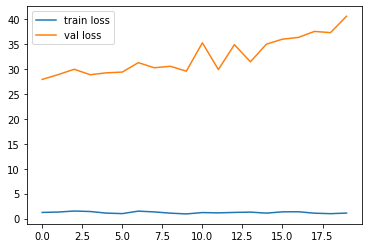

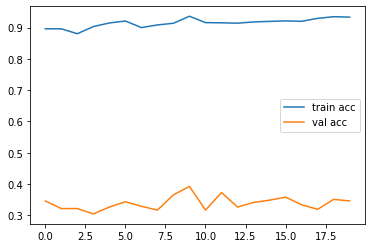

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [33]:
y_pred = model.predict(test_set)
y_pred

array([[3.0584007e-17, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.7771611e-15, 0.0000000e+00, 0.0000000e+00, ..., 5.5869296e-13,
        3.4716854e-20, 0.0000000e+00],
       ...,
       [0.0000000e+00, 3.3723184e-30, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.6805641e-29, 0.0000000e+00, 0.0000000e+00, ..., 2.5622121e-10,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.8233527e-33, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [34]:
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([120, 105,   7,  87,  29,   7,   7,  87,  96,  87, 108,  75, 121,
        94,   7,  63,  72,  76, 130,  40,   8,  53,   7,  14,  33,  11,
        87,  94,   2,   4,   7,  69, 114,  16, 130,  69,  27,  14,  41,
       133,   7,   7,  58,  15,  63,  93,  63,  59, 132, 104,  69,  77,
        12,  83, 111,  40, 130,  21,  97,  82,  78,  59,  43,  87, 124,
        14,  27,  37, 130,  69,  56,  80,  94,  69,  87,  79,  19,  78,
        47, 124, 114,  59,  14,  16, 124, 128,  87,   7,   7,  28, 130,
         7, 114,   7,  32,  14,  94,  59,  45,  69, 123,  12,  87, 126,
         7,  43, 122,  89, 132,  77,  14, 108,  36,  56,  76,  75,  53,
        61,  69,  14, 130,  16,  36,  57,  64,   7,   0,   2,   7, 114,
        70, 109,  82, 108,  87, 125,  94, 130,  14,  61,  94,  63,  54,
        36,  22, 107,  69,  63, 102,  30,  59,  69,  81,   0,  29, 123,
        47,  64,  14, 131,  56,  28, 132,  69,  27, 132,  18,  96,   4,
        73,  82,  43, 102,  17,  56,  65,  43, 130,  40,  69,  6

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
#loaded the model
model=load_model('model_inception.h5')

In [38]:
img=image.load_img('/content/drive/MyDrive/CNN_Dataset/test/0020b5ba2c.jpg',target_size=(224,224))

In [39]:
x=image.img_to_array(img)
x

array([[[ 62.,  27.,   0.],
        [ 65.,   7.,   6.],
        [ 62.,   0.,  23.],
        ...,
        [ 49.,   1.,   1.],
        [ 51.,   6.,   9.],
        [ 43.,   0.,   1.]],

       [[ 91.,  65.,   8.],
        [ 74.,  27.,   1.],
        [ 57.,   5.,   9.],
        ...,
        [ 48.,   2.,   2.],
        [ 56.,   7.,  11.],
        [ 53.,   4.,   8.]],

       [[118., 102.,  14.],
        [ 97.,  62.,   8.],
        [ 46.,   5.,   0.],
        ...,
        [ 46.,   0.,   0.],
        [ 61.,   0.,   7.],
        [ 62.,   7.,  12.]],

       ...,

       [[  3.,   7.,   6.],
        [  3.,   3.,   3.],
        [  1.,   8.,   0.],
        ...,
        [113.,  24.,  30.],
        [ 90.,  15.,  19.],
        [ 40.,   0.,   0.]],

       [[  2.,   6.,   5.],
        [  2.,   4.,   3.],
        [  5.,  12.,   4.],
        ...,
        [159.,  39.,  49.],
        [105.,   0.,   0.],
        [ 77.,   0.,   0.]],

       [[  3.,   5.,   2.],
        [  2.,   4.,   1.],
        [  7.,  

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[1.42540597e-11, 2.25001813e-08, 3.86899443e-13, 1.13065104e-08,
        2.41779210e-12, 4.11807264e-07, 1.84974743e-13, 3.97873893e-02,
        4.06353344e-18, 4.04828253e-16, 1.28651589e-09, 8.37799535e-12,
        1.04323101e-06, 6.04675077e-19, 1.51453272e-01, 1.04101017e-09,
        9.26629923e-07, 1.21085499e-15, 2.24064479e-05, 2.29869201e-07,
        5.15365173e-09, 2.37499176e-09, 6.29357970e-18, 3.07511347e-14,
        1.08560111e-04, 2.85790597e-12, 3.72360129e-13, 2.69374824e-14,
        1.05664819e-08, 8.84488177e-11, 2.22169216e-09, 5.20801979e-09,
        7.82660547e-10, 1.55652604e-14, 2.84859375e-03, 9.67483404e-15,
        1.23481148e-09, 1.78371022e-12, 2.75724017e-21, 8.20613397e-15,
        1.06121634e-09, 8.05182405e-14, 5.88479952e-06, 5.57233398e-06,
        3.89535977e-18, 1.47125159e-10, 1.38572764e-16, 9.59410681e-04,
        4.33236981e-15, 4.06081896e-12, 4.28682746e-17, 1.91092905e-11,
        3.88138481e-08, 3.38475843e-08, 4.95858021e-10, 4.817558

In [44]:
a=np.argmax(model.predict(img_data), axis=1)
a==1

array([False])